In [1]:
from pathlib import Path as Path

from matplotlib import pyplot as plt

from utils.plot import get_plt
from utils.data_io import get_csv
from utils.denoise import PointType, PointTypeEN

plt.rcParams["font.family"] = ["Times New Roman", "SimHei"]

In [2]:
pwd = Path(".")

for file in pwd.glob("intermediate*.csv"):
    print(f"file name: {file.name}")

file name: intermediate_data_effective_point.csv
file name: intermediate_data_importance.csv
file name: intermediate_data_optics.csv
file name: intermediate_data_origin.csv
file name: intermediate_data_predicted_cnn.csv
file name: intermediate_data_predicted_mlp.csv
file name: intermediate_data_seafloor_point.csv
file name: intermediate_data_water_surface.csv


In [3]:
intermediate_data_list = [
    {
        "path": "intermediate_data_origin.csv",
        "title": "Original Data",
    },
    {
        "path": "intermediate_data_water_surface.csv",
        "title": "Water Surface Data",
    },
    {
        "path": "intermediate_data_optics.csv",
        "title": "Optics Clustering Denoise",
    },
    {
        "path":"intermediate_data_effective_point.csv",
        "title": "Effective Points",
    },
    {
        "path": "intermediate_data_seafloor_point.csv",
        "title": "Underwater points",
    }
]

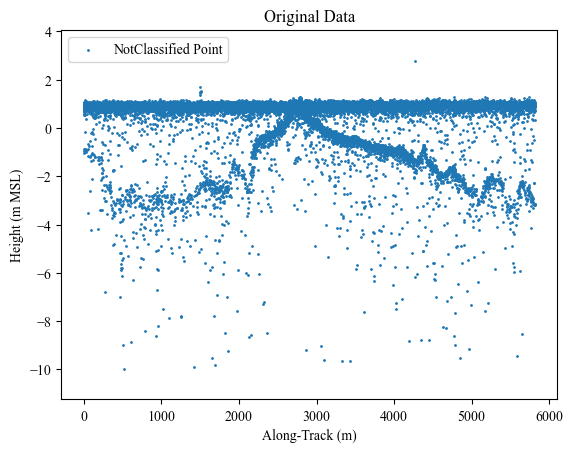

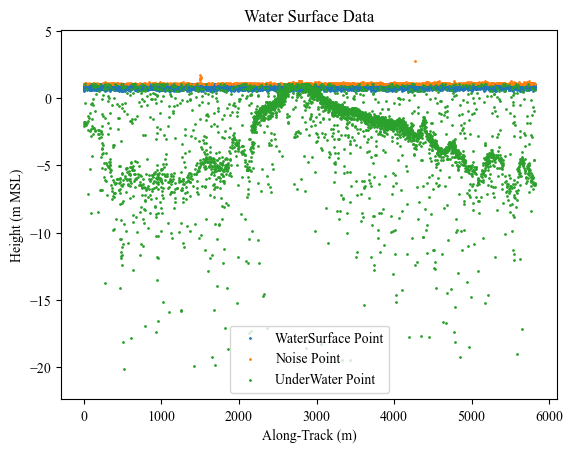

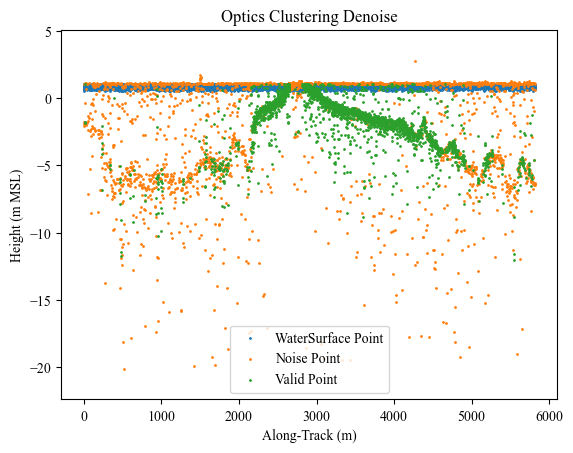

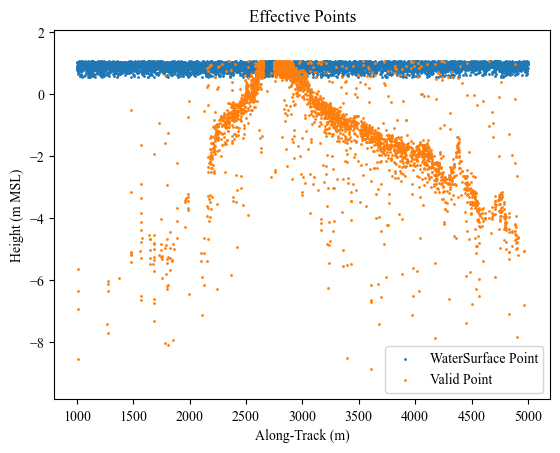

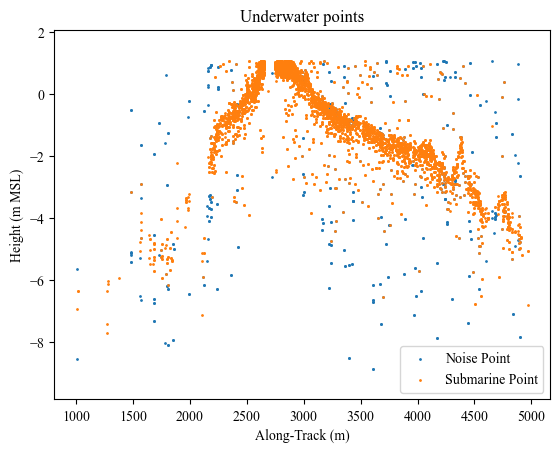

In [4]:
for data in intermediate_data_list:
    ds = get_csv(Path(data["path"]))
    ds["point_type"] = ds["point_type"].apply(lambda v: PointType(v).name if v in PointType._value2member_map_ else v)
    ds["point_type"] = ds["point_type"].apply(lambda k: PointTypeEN[k].value if k in PointTypeEN.__members__ else k)

    get_plt(ds, title=data["title"])